In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

In [2]:
data = fetch_olivetti_faces()
x = data.data
y = data.target

In [3]:
print(x.shape)
print(y.shape)

(400, 4096)
(400,)


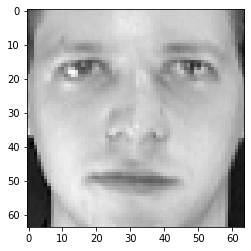

In [4]:
plt.imshow(x[0].reshape(64, 64), cmap='gray')

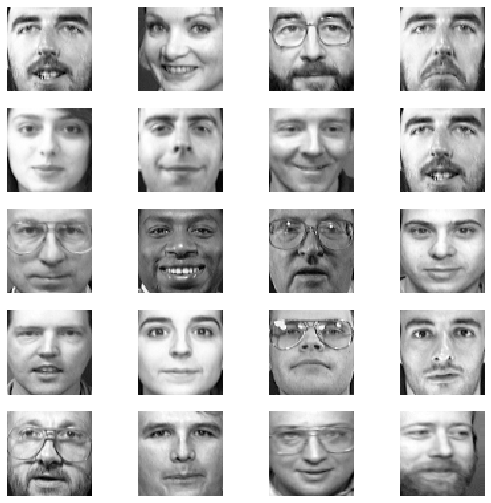

In [5]:
# Looking on a random set of images
fig = plt.figure(figsize=(9, 9))
cols = 4
rows = 5
for ind in range(1, cols*rows+1):
    img = x[np.random.randint(x.shape[0])].reshape(64, 64)
    fig.add_subplot(rows, cols, ind)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
plt.show()

In [6]:
x.shape

(400, 4096)

In [7]:
# Splitting into train and test set and having equal proportions
from sklearn.model_selection import StratifiedShuffleSplit

split_test = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_valid_ind, test_ind in split_test.split(x, y):
    x_train_valid, x_test = x[train_valid_ind], x[test_ind]
    y_train_valid, y_test = y[train_valid_ind], y[test_ind]

split_valid = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_ind, valid_ind in split_valid.split(x_train_valid, y_train_valid):
    x_train, x_valid = x_train_valid[train_ind], x_train_valid[valid_ind]
    y_train, y_valid = y_train_valid[train_ind], y_train_valid[valid_ind]

In [13]:
# Training on a classifier and checking performance

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=6)
rf.fit(x_train, y_train)
rf.score(x_valid, y_valid)

0.9583333333333334

In [11]:
# Using best_cluster size=97 and training kmeans model
from sklearn.cluster import KMeans

best_model = KMeans(n_clusters=97, random_state=42).fit(x_train)

In [12]:
# Data Reduction KMeans

x_train_red = best_model.transform(x_train)
x_valid_red = best_model.transform(x_valid)
x_test_red = best_model.transform(x_test)

rf.fit(x_train_red, y_train)
rf.score(x_valid_red, y_valid)

0.875

Reduction in performance on using original cluster size

In [14]:
# Using varting cluster sizes to find best cluster size
for k in np.arange(2, 200, 5):
    model = KMeans(n_clusters=k, random_state=42, n_jobs=6).fit(x_train)    
    rf.fit(model.transform(x_train), y_train)
    print("Clusters: {} Score:{}".format(
        k, rf.score(model.transform(x_valid), y_valid)))

Clusters: 2 Score:0.3333333333333333
Clusters: 7 Score:0.5833333333333334
Clusters: 12 Score:0.6666666666666666
Clusters: 17 Score:0.6805555555555556
Clusters: 22 Score:0.7222222222222222
Clusters: 27 Score:0.7638888888888888
Clusters: 32 Score:0.7916666666666666
Clusters: 37 Score:0.7638888888888888
Clusters: 42 Score:0.7777777777777778
Clusters: 47 Score:0.7777777777777778
Clusters: 52 Score:0.7777777777777778
Clusters: 57 Score:0.8194444444444444
Clusters: 62 Score:0.8333333333333334
Clusters: 67 Score:0.875
Clusters: 72 Score:0.875
Clusters: 77 Score:0.875
Clusters: 82 Score:0.8194444444444444
Clusters: 87 Score:0.8333333333333334
Clusters: 92 Score:0.8472222222222222
Clusters: 97 Score:0.875
Clusters: 102 Score:0.8611111111111112
Clusters: 107 Score:0.8472222222222222
Clusters: 112 Score:0.8888888888888888
Clusters: 117 Score:0.875
Clusters: 122 Score:0.8611111111111112
Clusters: 127 Score:0.8194444444444444
Clusters: 132 Score:0.8472222222222222
Clusters: 137 Score:0.819444444444

Looks like the best cluster size is 187

### Appending original features with reduced features

In [16]:
x_train_full = np.c_[x_train, x_train_red]
x_valid_full = np.c_[x_valid, x_valid_red]

In [17]:
rf.fit(x_train_full, y_train)
rf.score(x_valid_full, y_valid)

0.9861111111111112

Very Large increase in score when compared to original of 95.8% 